# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [1]:
#Import all libraries you may need in this cell:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

%matplotlib inline

## 1 - Finding the COVID-19 numbers per state.

In [2]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]


Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", parse_dates=['date'])
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
def cases_state(state, df):
  fig = plt.figure()
  ax = fig.add_axes([0, 0, 2, 2])
  df_state = df.loc[df["state"]==state]
  df_cases = df_state.loc[: , ["date", "cases"]]
  plt.plot(df_cases["date"], df_cases["cases"])
  plt.bar(df_cases["date"], df_cases["cases"])
  plt.xlabel("Date")
  plt.ylabel("Number of Cases")
  plotTitle = state+" COVID-19 Cases over Time"
  plt.title(plotTitle)
  plt.show()

In [5]:
def deaths_state(state, df):
  fig = plt.figure()
  ax = fig.add_axes([0, 0, 2, 2])
  df_state = df.loc[df["state"]==state]
  df_deaths = df_state.loc[: , ["date", "deaths"]]
  plt.plot(df_deaths["date"], df_deaths["deaths"])
  plt.bar(df_deaths["date"], df_deaths["deaths"])
  plt.xlabel("Date")
  plt.ylabel("Number of Cases")
  plotTitle = state+" COVID-19 Deaths over Time"
  plt.title(plotTitle)
  plt.show()

Call the functions on your assigned state to visualize the data.

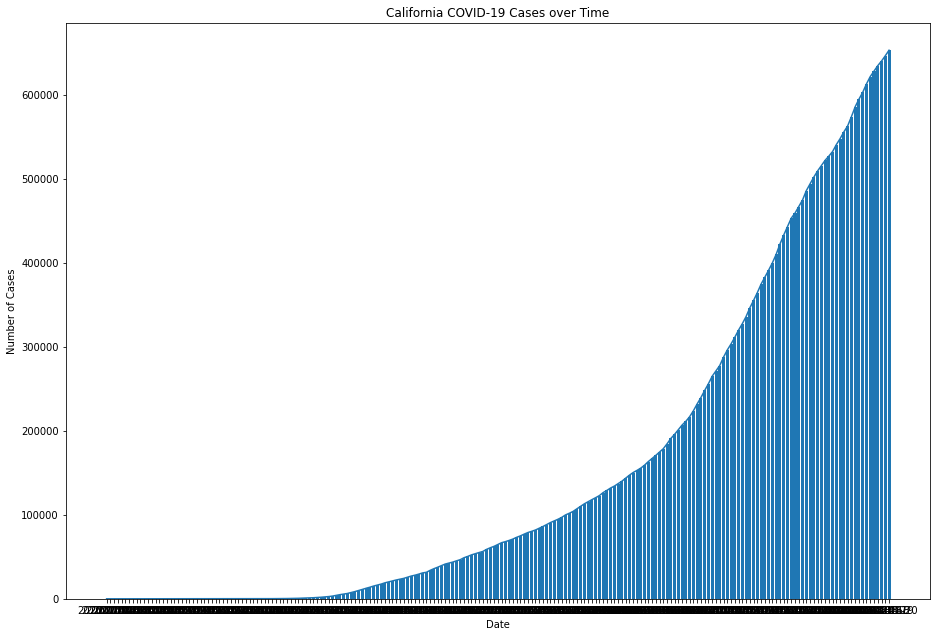

In [64]:
cases_state("California", df)

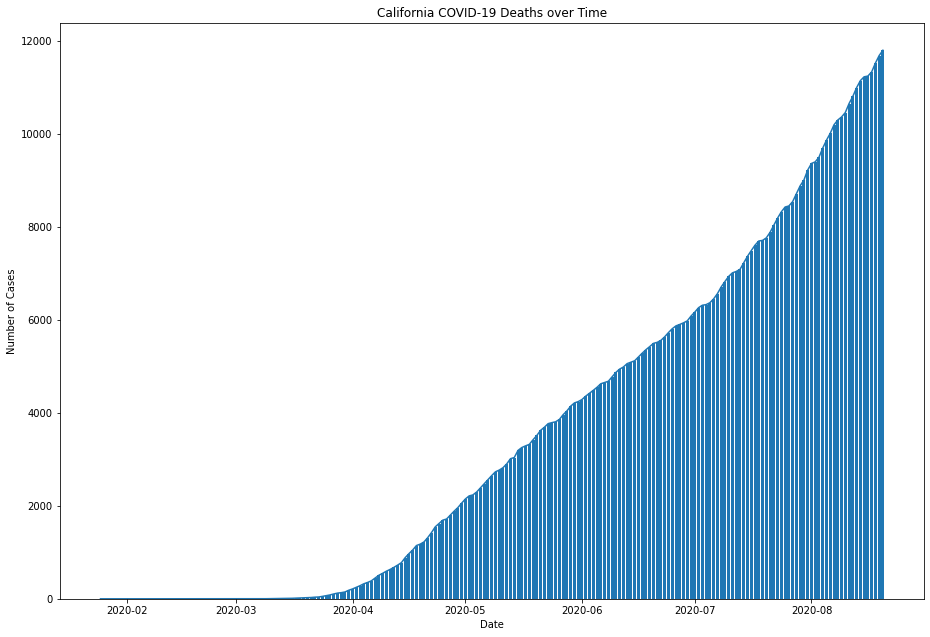

In [7]:
deaths_state("California", df)

#Choropleth Maps

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [8]:
#Dataframe Formatter
def dfFormatter(df, selectColumn):
    #Separate df_formatted from df. Create list of states and their latitudes and longitudes.
    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted['lat'] = latitudes
    df_formatted['long'] = longitudes
    
    #Create columns for each date, start off by zeroing out everything.
    #previousDate = datetime.datetime(2020, 1, 1) #Commented out because datetime is no longer a type.
    previousDate = "2020-01-01"
    for i in range(len(df['date'])):
        if df['date'][i] != previousDate:
            df_formatted[df['date'][i]] = 0

    #Set index to states temporarily.
    df_formatted.set_index('state', inplace=True)

    
    #Select which data you want to use based on the column that you are plotting (cases or deaths)
    if selectColumn == 'cases':
        #Get number of cases from df and put them in df_formatted.  
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'
    elif selectColumn == 'deaths':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'

    
    #Reset index when done so that state becomes a column without being the index.
    df_formatted.reset_index(inplace=True)
    
    #Drop last 5 rows because we are focusing on the 50 states.
    df_formatted.drop([50,51,52,53,54], inplace=True)
        
    return df_formatted

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [10]:
#Call the function and assign what it returns to the dataframe variables you will be using.
cases_df = dfFormatter(df, "cases")
cases_df.head()

,state,lat,long,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,...,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53587.0,55545.0,57255.0,59067.0,61088.0,63091.0,65234.0,67011.0,68891.0,70358.0,71813.0,74212.0,76005.0,78130.0,79294.0,81115.0,82366.0,83782.0,85762.0,87723.0,89349.0,91444.0,92661.0,93702.0,94654.0,96592.0,98301.0,100173.0,101334.0,103020.0,103851.0,104786.0,105557.0,106309.0,107580.0,108433.0,109004.0,110361.0,111478.0,112449.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1772.0,1843.0,1897.0,1958.0,2034.0,2083.0,2157.0,2275.0,2412.0,2523.0,2617.0,2682.0,2746.0,2866.0,3100.0,3204.0,3348.0,3440.0,3557.0,3675.0,3825.0,3982.0,4062.0,4123.0,4181.0,4221.0,4286.0,4371.0,4471.0,4537.0,4587.0,4653.0,4748.0,4867.0,4952.0,5058.0,5108.0,5175.0,5245.0,5330.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,122479.0,123917.0,128126.0,131411.0,134730.0,138575.0,141333.0,143644.0,145320.0,148730.0,150659.0,153029.0,156392.0,160055.0,162041.0,163918.0,165994.0,168361.0,170905.0,174108.0,177019.0,178473.0,179506.0,180537.0,182230.0,183744.0,185104.0,186226.0,187086.0,187634.0,188780.0,189522.0,190850.0,191810.0,192670.0,193554.0,194027.0,194931.0,195568.0,196305.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28367.0,28939.0,29733.0,30297.0,31114.0,31762.0,32533.0,33228.0,33927.0,34655.0,35246.0,36259.0,37249.0,37981.0,38623.0,39447.0,40181.0,40968.0,41759.0,42511.0,43173.0,43810.0,44597.0,45381.0,46293.0,47028.0,48039.0,48811.0,49383.0,50028.0,50411.0,51114.0,51766.0,52392.0,51992.0,52665.0,53077.0,53487.0,54216.0,54765.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,9.0,9.0,9.0,11.0,11.0,26.0,...,327676.0,336206.0,346593.0,355497.0,364761.0,374922.0,383194.0,391460.0,400195.0,410366.0,422528.0,433175.0,443096.0,453327.0,459338.0,467103.0,474951.0,486039.0,494269.0,502273.0,509507.0,515937.0,522235.0,527258.0,532776.0,541013.0,548142.0,556158.0,563244.0,574267.0,586078.0,595097.0,603212.0,613243.0,621981.0,628508.0,634991.0,640499.0,646742.0,653401.0


In [11]:
deaths_df = dfFormatter(df, "deaths")
deaths_df.head()

,state,lat,long,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,...,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1121.0,1124.0,1164.0,1211.0,1230.0,1265.0,1286.0,1287.0,1291.0,1303.0,1364.0,1397.0,1438.0,1456.0,1473.0,1491.0,1491.0,1538.0,1565.0,1580.0,1603.0,1627.0,1633.0,1666.0,1695.0,1714.0,1735.0,1755.0,1768.0,1797.0,1847.0,1882.0,1890.0,1893.0,1896.0,1898.0,1925.0,1936.0,1944.0,1974.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,17.0,17.0,17.0,18.0,18.0,19.0,20.0,20.0,21.0,21.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,24.0,24.0,24.0,24.0,25.0,25.0,25.0,26.0,26.0,26.0,27.0,27.0,27.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2239.0,2250.0,2341.0,2442.0,2506.0,2597.0,2733.0,2768.0,2795.0,2918.0,2976.0,3067.0,3156.0,3288.0,3313.0,3320.0,3424.0,3470.0,3628.0,3695.0,3753.0,3769.0,3785.0,3850.0,3933.0,4005.0,4085.0,4140.0,4152.0,4157.0,4205.0,4348.0,4385.0,4426.0,4497.0,4509.0,4509.0,4535.0,4643.0,4688.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,321.0,323.0,331.0,335.0,341.0,353.0,357.0,357.0,363.0,374.0,380.0,386.0,394.0,399.0,401.0,408.0,428.0,434.0,442.0,453.0,458.0,464.0,475.0,490.0,508.0,515.0,521.0,535.0,544.0,555.0,566.0,573.0,582.0,587.0,600.0,599.0,603.0,619.0,631.0,641.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7042.0,7086.0,7227.0,7368.0,7490.0,7607.0,7697.0,7710.0,7764.0,7883.0,8038.0,8190.0,8325.0,8428.0,8451.0,8544.0,8716.0,8884.0,9009.0,9222.0,9365.0,9399.0,9500.0,9696.0,9866.0,10014.0,10197.0,10299.0,10365.0,10460.0,10654.0,10808.0,10995.0,11146.0,11229.0,11245.0,11334.0,11523.0,11686.0,11801.0


Creating the Choropleth Maps

In [47]:
date = "2020-08-20"
# print(min(cases_df["2020-08-19"]))
# print(max(cases_df["2020-08-19"]))
state_abbrev = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND",
"OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
# print(len(state_abbrev))


colorList = ['#FF0000', '#FF1500', '#FF2B00', '#FF4000', '#FF5500', '#FF6A00', '#FF8000', '#FF9500', '#FFAA00', '#FFBF00', '#FFD500', '#FFEA00', '#FFFF00', '#EAFF0D', '#D5FF19', '#BFFF26', '#AAFF32', '#95FF3F', '#80FF4B', '#6AFF58', '#55FF64', '#40FF71', '#2BFF7D', '#15FF8A']
#['#FF0000', '#FF0C00', '#FF1700', '#FF2300', '#FF2F00', '#FF3A00', '#FF4600', '#FF5200', '#FF5D00', '#FF6900', '#FF7500', '#FF8000', '#FF8C00', '#FF9800', '#FFA300', '#FFAF00', '#EEB400', '#DDBA00', '#CCBF00', '#BBC400', '#AACA00', '#99CF00', '#88D400', '#77DA00', '#66DF00', '#55E400', '#44EA00', '#33EF00', '#22F400', '#11FA00']
title = date+": Number of COVID-19 Cases in the US"
fig = go.Figure(data=go.Choropleth(
    locationmode="USA-states",
    locations=state_abbrev,#cases_df["state"],
    z=cases_df[date],
    colorscale=colorList,
    colorbar_title=title,
    reversescale=True
))

fig.update_layout(
    title_text = title,
    geo=dict(showcoastlines=True,
             scope="usa")
)
fig.show()

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 2 - Analyzing Its Impact on the United States

Group 3 -

The United States population is over 300 million, and numbers can be more meaningful when put into other perspectives. Using the following dataset from ourworldindata.org(https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv), create a bar plot for the number of total cases per million people and a bar plot for new cases per million people.

In [27]:
populationDF = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", parse_dates=["date"])

In [28]:
populationDF.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [29]:
df_USA = populationDF.loc[populationDF["location"]=="United States"]

In [44]:
df_USA.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
36188,USA,North America,United States,2020-08-17,5403269.0,42104.0,51200.714,170052.0,571.0,1016.286,16323.945,127.201,154.684,513.748,1.725,3.070,648116.0,67621119.0,204.292,1.958,729706.0,2.205,14.252,0.070,units unclear (incl. non-PCR),68.98,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
36189,USA,North America,United States,2020-08-18,5438325.0,35056.0,49133.000,170497.0,445.0,1005.143,16429.854,105.909,148.437,515.093,1.344,3.037,642814.0,68263933.0,206.234,1.942,715954.0,2.163,14.572,0.069,units unclear (incl. non-PCR),NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
36190,USA,North America,United States,2020-08-19,5482416.0,44091.0,48744.143,171821.0,1324.0,1040.571,16563.058,133.204,147.262,519.093,4.000,3.144,680934.0,68944867.0,208.291,2.057,744795.0,2.250,15.280,0.065,units unclear (incl. non-PCR),NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
36191,USA,North America,United States,2020-08-20,5529842.0,47426.0,47527.714,173177.0,1356.0,1021.429,16706.338,143.280,143.587,523.189,4.097,3.086,635809.0,69580676.0,210.212,1.921,709806.0,2.144,14.935,0.067,units unclear (incl. non-PCR),NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
36192,USA,North America,United States,2020-08-21,5573847.0,44005.0,46515.000,174255.0,1078.0,1020.714,16839.282,132.945,140.528,526.446,3.257,3.084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86


In [59]:
def plot(variable, y):
  plt.clf()
  fig = plt.figure()
  ax = fig.add_axes([0, 0, 2, 2])
  plt.plot(df_USA["date"], df_USA[variable])
  plt.bar(df_USA["date"], df_USA[variable])
  plt.xlabel("Date")
  plt.ylabel(y)
  plt.title("US "+y+" over Time")
  plt.show()

<Figure size 432x288 with 0 Axes>

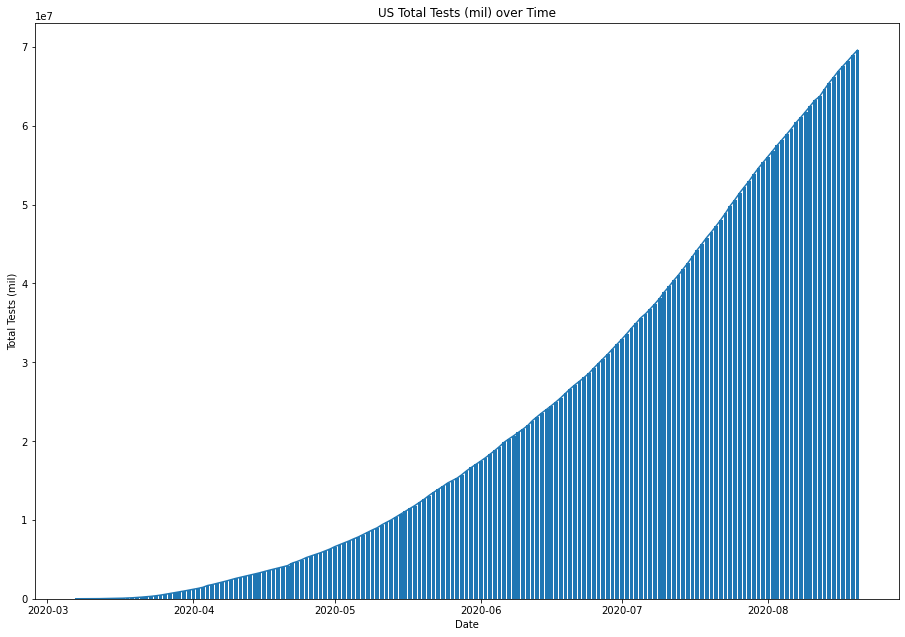

In [62]:
plot("total_tests", "Total Tests (mil)")

<Figure size 432x288 with 0 Axes>

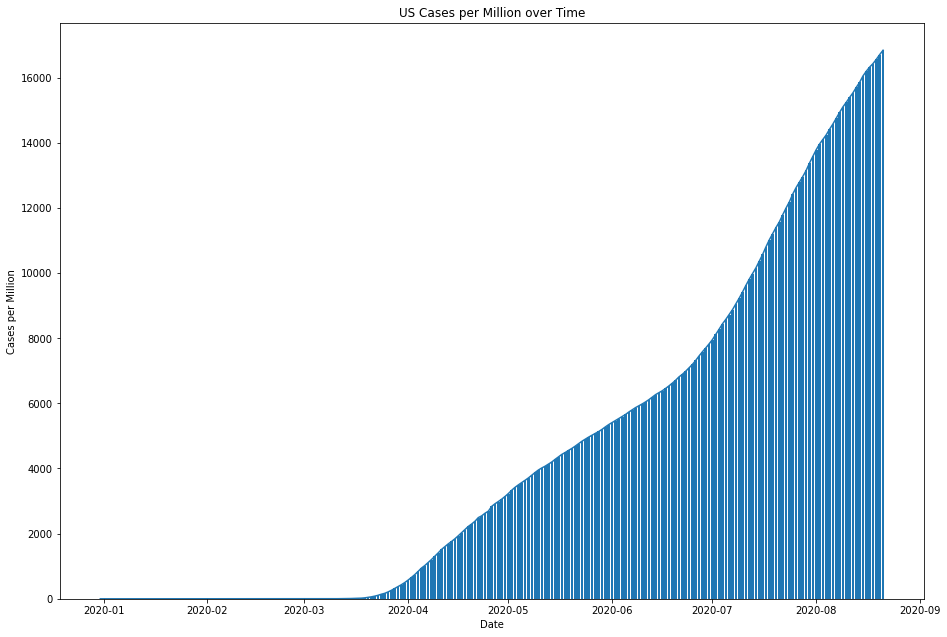

In [36]:
plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
plt.plot(df_USA["date"], df_USA["total_cases_per_million"])
plt.bar(df_USA["date"], df_USA["total_cases_per_million"])
plt.xlabel("Date")
plt.ylabel("Cases per Million")
plt.title("US Cases per Million over Time")
plt.savefig("/content/drive/My Drive/Bridge-Up STEM/Created Graphs and Plots/82120-US_Cases_per_Million.png")

<Figure size 432x288 with 0 Axes>

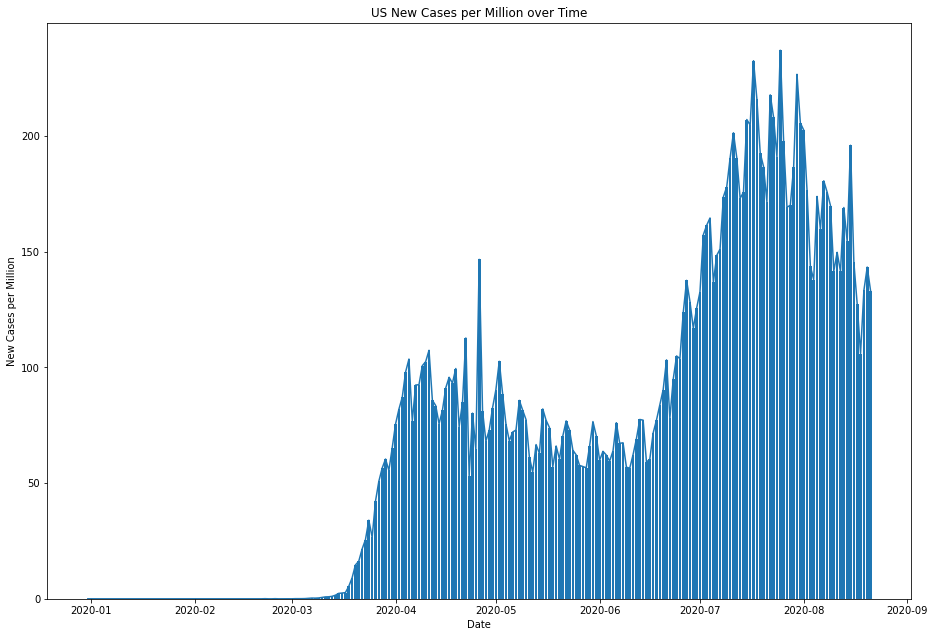

In [50]:
plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
plt.plot(df_USA["date"], df_USA["new_cases_per_million"])
plt.bar(df_USA["date"], df_USA["new_cases_per_million"])
plt.xlabel("Date")
plt.ylabel("New Cases per Million")
plt.title("US New Cases per Million over Time")
plt.savefig("/content/drive/My Drive/Bridge-Up STEM/Created Graphs and Plots/82120-US_New_Cases_per_Million.png")

<Figure size 432x288 with 0 Axes>

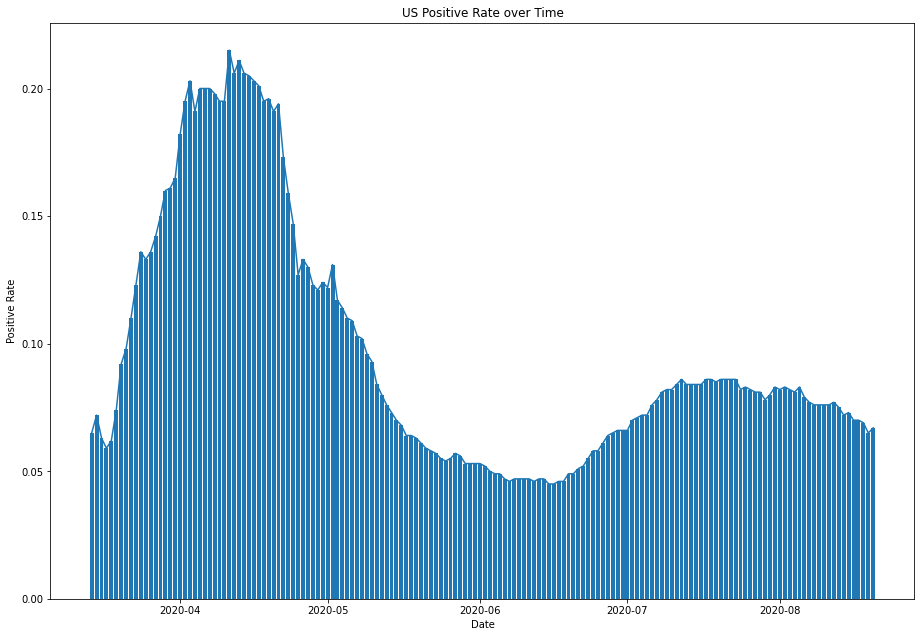

In [49]:
plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
plt.plot(df_USA["date"], df_USA["positive_rate"])
plt.bar(df_USA["date"], df_USA["positive_rate"])
plt.xlabel("Date")
plt.ylabel("Positive Rate")
plt.title("US Positive Rate over Time")
plt.savefig("/content/drive/My Drive/Bridge-Up STEM/Created Graphs and Plots/82120-US_Positive Rate.png")

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..

#Choropleth by Counties

In [39]:
countiesDF = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
countiesDF.tail()

,date,county,state,fips,cases,deaths
453650,2020-08-20,Sweetwater,Wyoming,56037.0,285,2
453651,2020-08-20,Teton,Wyoming,56039.0,398,1
453652,2020-08-20,Uinta,Wyoming,56041.0,283,2
453653,2020-08-20,Washakie,Wyoming,56043.0,105,5
453654,2020-08-20,Weston,Wyoming,56045.0,11,0


#More Choropleth Maps

In [46]:
populationDF.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
38633,NaN,NaN,International,2020-08-17,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38634,NaN,NaN,International,2020-08-18,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38635,NaN,NaN,International,2020-08-19,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38636,NaN,NaN,International,2020-08-20,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38637,NaN,NaN,International,2020-08-21,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
